In [2]:
import pandas as pd
import numpy as np
import random
import sklearn
from sklearn.model_selection import *
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
#Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from numpy import cov
import keras
from keras.layers import Activation, Dense, Dropout, Flatten,MaxPooling1D
from keras.models import Sequential
#from keras.layers import GaussianNoise
from keras import optimizers
import warnings
warnings.filterwarnings('ignore')
from scipy import stats as st
import datetime
import tensorflow as tf
import math

from scipy.stats import zscore

Using TensorFlow backend.


In [33]:
data = pd.read_csv("emission.csv")

In [34]:
i = data[(data['Area harvested'] == 0) |(data['Production quantity'] == 0)].index
data=data.drop(i)

In [49]:
#data.isnull().sum()

# Experiment 1: Dropping AH

# Experiment 1a

In [4]:
data.drop(['Area harvested'],inplace=True,axis=1)
data.head()

,Country,Crop,Year,Production quantity,Yield,Annual Population,Total emission
0,Afghanistan,Barley,1961,378000.0,10800.0,9169.410,35.3617
1,Afghanistan,Barley,1962,378000.0,10800.0,9351.441,35.3617
2,Afghanistan,Barley,1963,378000.0,10800.0,9543.205,35.3617
3,Afghanistan,Barley,1964,380000.0,10857.0,9744.781,35.4883
4,Afghanistan,Barley,1965,380000.0,10857.0,9956.320,35.4883


In [5]:
en = preprocessing.LabelEncoder()
en.fit(data["Country"])
area = en.transform(data["Country"])
data["Country"] = area
en.fit(data["Crop"])
items = en.transform(data["Crop"])
data["Crop"] = items

data["Production quantity"] = np.log10(data["Production quantity"])
data["Yield"] = np.log10(data["Yield"])
data["Annual Population"] = np.log10(data["Annual Population"])
data["Total emission"] = np.log10(data["Total emission"])

In [4]:
#np.random.shuffle(data)
X = np.array(data.iloc[:,:5])
y = np.array(data.iloc[:,6])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=500)

NameError: name 'data' is not defined

# Experiment 1a: MLP Regressor

In [7]:
regr = MLPRegressor(hidden_layer_sizes=(120,64,18,8,6 ), activation='relu', solver='adam', alpha=0.01, 
                    batch_size='auto',verbose=False,
                    max_iter=100, shuffle=True, random_state=50)
regr.fit(X_train, y_train)


MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(120, 64, 18, 8, 6), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=100,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=50, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

NameError: name 'X_train' is not defined

In [8]:
print("Experiment 1a_MLP")
print("Test metrics")
MLP_1a_test = regr.predict(X_test)

print("Test MAE:", round(mean_absolute_error(y_test, MLP_1a_test),3))
print("Test R2", round(r2_score(y_test, MLP_1a_test),3))
print("Test MSE:", round(mean_squared_error(y_test, MLP_1a_test, squared= False),3))
print("Test RMSE:",round(mean_squared_error(y_test, MLP_1a_test, squared= True),3))

print("Train metrics")
MLP_1a_train = regr.predict(X_train)

print("Train MAE:", round(mean_absolute_error(y_train, MLP_1a_train),3))
print("Train R2", round(r2_score(y_train, MLP_1a_train),3))
print("Train MSE:", round(mean_squared_error(y_train, MLP_1a_train, squared= False),3))
print("Train RMSE:",round(mean_squared_error(y_train, MLP_1a_train, squared= True),3))

Experiment 1a_MLP
Test metrics
Test MAE: 0.205
Test R2 0.962
Test MSE: 0.269
Test RMSE: 0.072
Train metrics
Train MAE: 0.205
Train R2 0.961
Train MSE: 0.269
Train RMSE: 0.073


Experiment 1a_MLP_test


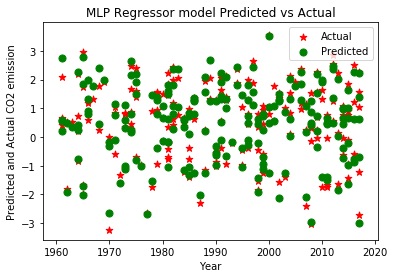

In [9]:
print("Experiment 1a_MLP_test")
plt.scatter(X_test[:200,2],y_test[:200],marker='*',color='r',s=50)
plt.scatter(X_test[:200,2],MLP_1a_test[:200],color='g',s=50)
plt.title('MLP Regressor model Predicted vs Actual')
plt.ylabel('Predicted and Actual CO2 emission')
plt.xlabel('Year')
plt.legend(['Actual', 'Predicted'], loc='upper right')
# plt.show()
# plt.savefig('Ex:1_Model_MSE.jpg', bbox_inches='tight')

Experiment 1a_MLP_test


Text(-2.0, 2.0, 'R-squared = 0.96')

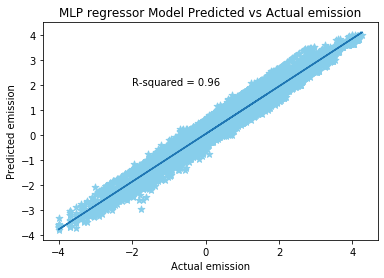

In [10]:
print("Experiment 1a_MLP_test")
plt.scatter(y_test,MLP_1a_test,s=50,marker='*',color='skyblue')
m, b = np.polyfit(y_test, MLP_1a_test,1)
plt.plot(y_test, m*y_test + b)
plt.title('MLP regressor Model Predicted vs Actual emission')
plt.ylabel('Predicted emission')
plt.xlabel('Actual emission')
plt.text(-2.0, 2.0, 'R-squared = %0.2f' % r2_score(y_test, MLP_1a_test))

# Experiment 1b: MLP Regressor

In [11]:
df=data.copy()
cols = list(df.columns)
cols.remove('Country')
cols.remove('Crop')
cols.remove('Year')
df[cols]
df[cols]=df[cols].apply(zscore)

In [12]:
df.head()

,Country,Crop,Year,Production quantity,Yield,Annual Population,Total emission
0,0,0,1961,0.487802,-0.669556,-0.076500,0.681998
1,0,0,1962,0.487802,-0.669556,-0.065645,0.681998
2,0,0,1963,0.487802,-0.669556,-0.054435,0.681998
3,0,0,1964,0.489424,-0.665639,-0.042892,0.683132
4,0,0,1965,0.489424,-0.665639,-0.031032,0.683132


In [13]:
X1 = np.array(df.iloc[:,:5])
y1 = np.array(df.iloc[:,6])
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.30, random_state=300)

In [14]:
regr = MLPRegressor(hidden_layer_sizes=(120,64,18,8,6 ), activation='relu', solver='adam', alpha=0.01, 
                    batch_size='auto',verbose=False,
                    max_iter=100, shuffle=True, random_state=50)
regr.fit(X1_train, y1_train)


MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(120, 64, 18, 8, 6), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=100,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=50, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [15]:
print("Test metrics 1b_test")
MLP_1b_test = regr.predict(X1_test)

print("Test MAE:", round(mean_absolute_error(y1_test, MLP_1b_test),3))
print("Test R2", round(r2_score(y1_test, MLP_1b_test),3))
print("Test MSE:", round(mean_squared_error(y1_test, MLP_1b_test, squared= False),3))
print("Test RMSE:",round(mean_squared_error(y1_test, MLP_1b_test, squared= True),3))

print("Train metrics")
MLP_1b_train = regr.predict(X1_train)

print("Train MAE:", round(mean_absolute_error(y1_train, MLP_1b_train),3))
print("Train R2", round(r2_score(y1_train, MLP_1b_train),3))
print("Train MSE:", round(mean_squared_error(y1_train, MLP_1b_train, squared= False),3))
print("Train RMSE:",round(mean_squared_error(y1_train, MLP_1b_train, squared= True),3))

Test metrics 1b_test
Test MAE: 0.153
Test R2 0.959
Test MSE: 0.203
Test RMSE: 0.041
Train metrics
Train MAE: 0.152
Train R2 0.96
Train MSE: 0.201
Train RMSE: 0.04


Experiment 1b_MLP_test


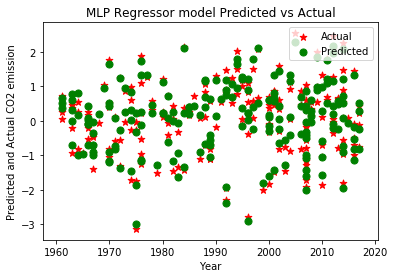

In [17]:
print("Experiment 1b_MLP_test")
plt.scatter(X1_test[:200,2],y1_test[:200],marker='*',color='r',s=50)
plt.scatter(X1_test[:200,2],MLP_1b_test[:200],color='g',s=50)
plt.title('MLP Regressor model Predicted vs Actual')
plt.ylabel('Predicted and Actual CO2 emission')
plt.xlabel('Year')
plt.legend(['Actual', 'Predicted'], loc='upper right')
# plt.show()
# plt.savefig('Ex:1_Model_MSE.jpg', bbox_inches='tight')

Experiment 1b_MLP_test


Text(-2.0, 2.0, 'R-squared = 0.96')

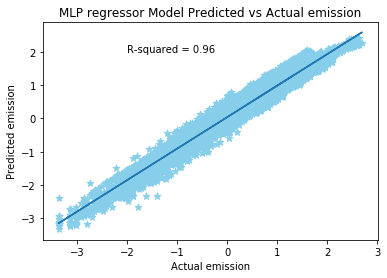

In [18]:
print("Experiment 1b_MLP_test")
plt.scatter(y1_test,MLP_1b_test,s=50,marker='*',color='skyblue')
m, b = np.polyfit(y1_test, MLP_1b_test,1)
plt.plot(y1_test, m*y1_test + b)
plt.title('MLP regressor Model Predicted vs Actual emission')
plt.ylabel('Predicted emission')
plt.xlabel('Actual emission')
plt.text(-2.0, 2.0, 'R-squared = %0.2f' % r2_score(y1_test, MLP_1b_test))

# Experiment 2: 

In [19]:
data1 = pd.read_csv("emission.csv")

In [20]:
i = data1[(data1['Area harvested'] == 0) |(data1['Production quantity'] == 0)].index
data1=data1.drop(i)

In [21]:
data1.head()

,Country,Crop,Year,Area harvested,Production quantity,Yield,Annual Population,Total emission
0,Afghanistan,Barley,1961,350000.0,378000.0,10800.0,9169.410,35.3617
1,Afghanistan,Barley,1962,350000.0,378000.0,10800.0,9351.441,35.3617
2,Afghanistan,Barley,1963,350000.0,378000.0,10800.0,9543.205,35.3617
3,Afghanistan,Barley,1964,350000.0,380000.0,10857.0,9744.781,35.4883
4,Afghanistan,Barley,1965,350000.0,380000.0,10857.0,9956.320,35.4883


In [22]:
data1["Production quantity"] = (data1["Production quantity"]/data1["Area harvested"])
data1["Yield"] = (data1["Yield"]/data1["Area harvested"])

In [23]:
data1.head()

,Country,Crop,Year,Area harvested,Production quantity,Yield,Annual Population,Total emission
0,Afghanistan,Barley,1961,350000.0,1.080000,0.030857,9169.410,35.3617
1,Afghanistan,Barley,1962,350000.0,1.080000,0.030857,9351.441,35.3617
2,Afghanistan,Barley,1963,350000.0,1.080000,0.030857,9543.205,35.3617
3,Afghanistan,Barley,1964,350000.0,1.085714,0.031020,9744.781,35.4883
4,Afghanistan,Barley,1965,350000.0,1.085714,0.031020,9956.320,35.4883


In [24]:
data1.drop(['Area harvested'],inplace=True,axis=1)

In [25]:
data1["Production quantity"] = np.log10(data1["Production quantity"])
data1["Yield"] = np.log10(data1["Yield"])
data1['Annual Population']=np.log10(data1['Annual Population'])
data1['Total emission']=np.log(data1['Total emission'])

In [26]:
data1.head()

,Country,Crop,Year,Production quantity,Yield,Annual Population,Total emission
0,Afghanistan,Barley,1961,0.033424,-1.510644,3.962341,3.565629
1,Afghanistan,Barley,1962,0.033424,-1.510644,3.970879,3.565629
2,Afghanistan,Barley,1963,0.033424,-1.510644,3.979694,3.565629
3,Afghanistan,Barley,1964,0.035716,-1.508358,3.988772,3.569203
4,Afghanistan,Barley,1965,0.035716,-1.508358,3.998099,3.569203


In [27]:
en = preprocessing.LabelEncoder()
en.fit(data1["Country"])
area = en.transform(data1["Country"])
data1["Country"] = area

en.fit(data1["Crop"])
items = en.transform(data1["Crop"])
data1["Crop"] = items

In [28]:
#np.random.shuffle(data)
X = np.array(data1.iloc[:,:5])
y = np.array(data1.iloc[:,6])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=500)

# Experiment 2a: MLP Regressor

In [29]:
regr = MLPRegressor(hidden_layer_sizes=(120,64,18,8,6 ), activation='relu', solver='adam', alpha=0.01, 
                    batch_size='auto',verbose=False,
                    max_iter=100, shuffle=True, random_state=50)
regr.fit(X_train, y_train)


MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(120, 64, 18, 8, 6), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=100,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=50, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [30]:
print("Metrics for Exp 2a")
print("Test metrics")
MLP_2a_test = regr.predict(X_test)

print("Test MAE:", round(mean_absolute_error(y_test, MLP_2a_test),3))
print("Test R2", round(r2_score(y_test, MLP_2a_test),3))
print("Test MSE:", round(mean_squared_error(y_test, MLP_2a_test, squared= False),3))
print("Test RMSE:",round(mean_squared_error(y_test, MLP_2a_test, squared= True),3))

print("Train metrics")
MLP_2a_train = regr.predict(X_train)

print("Train MAE:", round(mean_absolute_error(y_train, MLP_2a_train),3))
print("Train R2", round(r2_score(y_train, MLP_2a_train),3))
print("Train MSE:", round(mean_squared_error(y_train, MLP_2a_train, squared= False),3))
print("Train RMSE:",round(mean_squared_error(y_train, MLP_2a_train, squared= True),3))

Metrics for Exp 2a
Test metrics
Test MAE: 0.266
Test R2 0.988
Test MSE: 0.352
Test RMSE: 0.124
Train metrics
Train MAE: 0.269
Train R2 0.987
Train MSE: 0.358
Train RMSE: 0.128


Experiment 2a_MLP_test


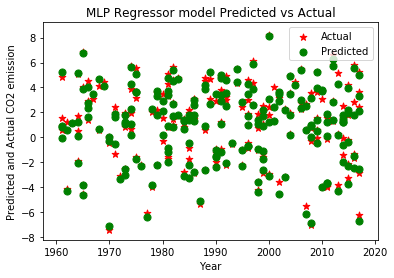

In [31]:
print("Experiment 2a_MLP_test")
plt.scatter(X_test[:200,2],y_test[:200],marker='*',color='r',s=50)
plt.scatter(X_test[:200,2],MLP_2a_test[:200],color='g',s=50)
plt.title('MLP Regressor model Predicted vs Actual')
plt.ylabel('Predicted and Actual CO2 emission')
plt.xlabel('Year')
plt.legend(['Actual', 'Predicted'], loc='upper right')
# plt.show()
# plt.savefig('Ex:1_Model_MSE.jpg', bbox_inches='tight')

Experiment 2a_MLP_test


Text(-4.8, 2.0, 'R-squared = 0.99')

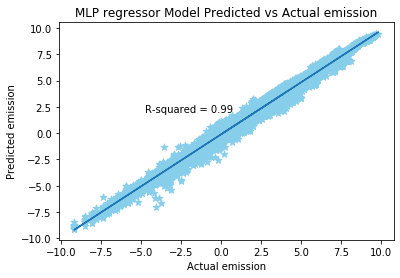

In [32]:
print("Experiment 2a_MLP_test")
plt.scatter(y_test,MLP_2a_test,s=50,marker='*',color='skyblue')
m, b = np.polyfit(y_test, MLP_2a_test,1)
plt.plot(y_test, m*y_test + b)
plt.title('MLP regressor Model Predicted vs Actual emission')
plt.ylabel('Predicted emission')
plt.xlabel('Actual emission')
plt.text(-4.8, 2.0, 'R-squared = %0.2f' % r2_score(y_test, MLP_2a_test))

# Experiment 2b: MLP Regressor

In [114]:
df1=data1.copy()
cols = list(df1.columns)
cols.remove('Country')
cols.remove('Crop')
cols.remove('Year')
df1[cols]
df1[cols]=df1[cols].apply(zscore)

In [115]:
df1.head()

,Country,Crop,Year,Production quantity,Yield,Annual Population,Total emission
0,0,0,1961,-0.669602,-0.995993,-0.076500,0.681998
1,0,0,1962,-0.669602,-0.995993,-0.065645,0.681998
2,0,0,1963,-0.669602,-0.995993,-0.054435,0.681998
3,0,0,1964,-0.665675,-0.994445,-0.042892,0.683132
4,0,0,1965,-0.665675,-0.994445,-0.031032,0.683132


In [116]:
X1 = np.array(df1.iloc[:,:5])
y1 = np.array(df1.iloc[:,6])
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.30, random_state=300)

In [117]:
regr = MLPRegressor(hidden_layer_sizes=(120,64,18,8,6 ), activation='relu', solver='adam', alpha=0.01, 
                    batch_size='auto',verbose=False,
                    max_iter=100, shuffle=True, random_state=50)
regr.fit(X1_train, y1_train)


MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(120, 64, 18, 8, 6), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=100,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=50, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [119]:
print("Test metrics 2b")
MLP_2b_test = regr.predict(X1_test)

print("Test MAE:", round(mean_absolute_error(y1_test, MLP_2b_test),3))
print("Test R2", round(r2_score(y1_test, MLP_2b_test),3))
print("Test MSE:", round(mean_squared_error(y1_test, MLP_2b_test, squared= False),3))
print("Test RMSE:",round(mean_squared_error(y1_test, MLP_2b_test, squared= True),3))

print("Train metrics")
MLP_2b_train = regr.predict(X1_train)

print("Train MAE:", round(mean_absolute_error(y1_train, MLP_2b_train),3))
print("Train R2", round(r2_score(y1_train, MLP_2b_train),3))
print("Train MSE:", round(mean_squared_error(y1_train, MLP_2b_train, squared= False),3))
print("Train RMSE:",round(mean_squared_error(y1_train, MLP_2b_train, squared= True),3))

Test metrics 2b
Test MAE: 0.155
Test R2 0.96
Test MSE: 0.2
Test RMSE: 0.04
Train metrics
Train MAE: 0.153
Train R2 0.96
Train MSE: 0.199
Train RMSE: 0.04


MLP_Experiment 2b_Test


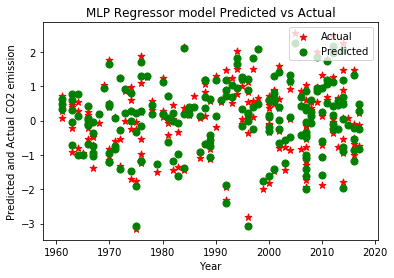

In [120]:
print("MLP_Experiment 2b_Test")
plt.scatter(X1_test[:200,2],y1_test[:200],marker='*',color='r',s=50)
plt.scatter(X1_test[:200,2],MLP_2b_test[:200],color='g',s=50)
plt.title('MLP Regressor model Predicted vs Actual')
plt.ylabel('Predicted and Actual CO2 emission')
plt.xlabel('Year')
plt.legend(['Actual', 'Predicted'], loc='upper right')
# plt.show()
# plt.savefig('Ex:1_Model_MSE.jpg', bbox_inches='tight')

MLP Experiment 2b


Text(-2.0, 2.0, 'R-squared = 0.96')

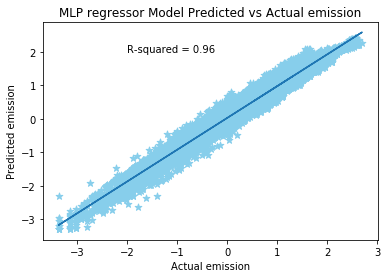

In [122]:
print("MLP Experiment 2b_test")
plt.scatter(y1_test,MLP_2b_test,s=50,marker='*',color='skyblue')
m, b = np.polyfit(y1_test, MLP_2b_test,1)
plt.plot(y1_test, m*y1_test + b)
plt.title('MLP regressor Model Predicted vs Actual emission')
plt.ylabel('Predicted emission')
plt.xlabel('Actual emission')
plt.text(-2.0, 2.0, 'R-squared = %0.2f' % r2_score(y1_test, MLP_2b_test))